In [33]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [34]:
!pip install streamlit

# Prédiction de la survie d'un passager du [Titanic](https://www.kaggle.com/c/titanic)

In [35]:
df = pd.read_csv("train.csv",index_col=0)
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [36]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [37]:
df = df.dropna()

## Dataviz

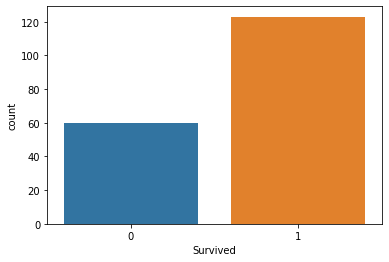

In [38]:
sns.countplot(x="Survived",data=df);

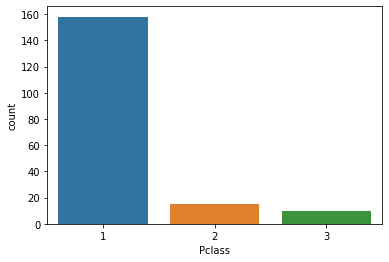

In [39]:
sns.countplot(x='Pclass',data=df);

In [40]:
import plotly.express as px

In [41]:
px.histogram(df,x="Sex")

In [42]:
px.histogram(df,x="Survived",color="Sex",barmode="group")

In [43]:
px.sunburst(df, path = ['Sex', 'Pclass', 'Survived'])

## Modélisation

In [44]:
df = df.drop(['Name', 'Sex' ,'Ticket', 'Cabin', 'Embarked'], axis = 1)

X = df.drop("Survived",axis=1)
y = df["Survived"]

In [45]:
def train_model(estimator,name,size=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = size)
    estimator.fit(X_train,y_train)
    score_test = estimator.score(X_test,y_test)
    score_train = estimator.score(X_train,y_train)
    print("Le modèle {} a une accuracy sur l'échantillon d'entraînement {}".format(name,score_train))
    print("Le modèle {} a une accuracy sur l'échantillon de test {}".format(name,score_test))
    return score_test,score_train

### Régression logistique

In [46]:
train_model(LogisticRegression(),"Régression Logistique")

Le modèle Régression Logistique a une accuracy sur l'échantillon d'entraînement 0.6986301369863014
Le modèle Régression Logistique a une accuracy sur l'échantillon de test 0.7567567567567568


(0.7567567567567568, 0.6986301369863014)

### Arbre de décision

In [47]:
train_model(LogisticRegression(),"Arbre de décision")

Le modèle Arbre de décision a une accuracy sur l'échantillon d'entraînement 0.773972602739726
Le modèle Arbre de décision a une accuracy sur l'échantillon de test 0.4864864864864865


(0.4864864864864865, 0.773972602739726)

### K-Voisins

In [48]:
train_model(LogisticRegression(),"K-Voisins")

Le modèle K-Voisins a une accuracy sur l'échantillon d'entraînement 0.7191780821917808
Le modèle K-Voisins a une accuracy sur l'échantillon de test 0.7297297297297297


(0.7297297297297297, 0.7191780821917808)